<a href="https://colab.research.google.com/github/sungj0/data-ai/blob/master/MidTermPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 1 - What's your pet

MidTerm Part 1: Write your answers in this notebook and submit it to your github. This notebook is not complete, and you need to fill it to make it work. You may need to read the manual for some functions and classes.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart, uncomment the 2nd line below to use a smaller *batch size* (you'll learn all about what this means during the course), and try again.

In [3]:
bs = 64

## Looking at the data

We are going to use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) by [O. M. Parkhi et al., 2012](http://www.robots.ox.ac.uk/~vgg/publications/2012/parkhi12a/parkhi12a.pdf) which features 12 cat breeds and 25 dogs breeds. Our model will need to learn to differentiate between these 37 distinct categories. 

We are going to use the `untar_data` function to which we must pass a URL as an argument and which will download and extract the data.

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False, verbose=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS); 
# Question 1. 1.1) What is the value of variable URLs.PETS?
## It is predefined variable which is from URL https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz.

# 1.2) From which package would URLs.PETS have been imported?
## fastai.datasets. we import this package by 'from fasai.vision import *'. we can see the source code so that it is in 'datasets.py'

# 1.3) To which folder in your remote colab machine is the content of URLs.PETS downloaded?
## We can see the folder by entering 'path'. It is in /root/.fastai/data/oxford-iilt-pet

# 1.4) What are the contents of this folder?
##There are .fastai contents in root folder

In [9]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [10]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [11]:
path_anno = path/'annotations'
path_img = path/'images'

The first thing we do when we approach a problem is to take a look at the data. We _always_ need to understand very well what the problem is and what the data looks like before we can figure out how to solve it. Taking a look at the data means understanding how the data directories are structured, what the labels are and what some sample images look like.


In [ ]:
# Question 2. 2.1) Show me the names of 10 image files from the folder to which the image files were downloaded.
# Use function get_image_files() to do this.

# 2.2) Having see the names of the image files, can you guess what the name of each
# image file represent?
## I can see the species of dogs. I think the first names(for example, 'great_pyrenees' is for hte category name) is category. And the numbers show
##that there are many 'great_pyrenees' in the images.


In [12]:
fnames=get_image_files(path_img)
fnames[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_65.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_75.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_148.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_90.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_250.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_59.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Birman_63.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_155.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_73.jpg')]

In [6]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [13]:
dataBunch = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(),
                                  size=224, bs=bs).normalize(imagenet_stats)
# Question 3. 3.1) Use function from_name_re of class ImageDataBunch to create a "dataBunch".
# The dataBunch contains information about the size of the batch, the images to be used for training
# the neural network and their labels, the images to be used for validating the neural network and their labels.
                 
                                

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [15]:
dataBunch

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
great_pyrenees,basset_hound,shiba_inu,Sphynx,english_cocker_spaniel
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Siamese,Birman,leonberger,shiba_inu,Abyssinian
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

In [ ]:
# Question 4. Please answer the following questions about the created dataBunch: 
# 4.1) How many image items does the Train dataset contain?
## 5912 items

# 4.2) How many category items does the Train dataset contain?
## category items are 5912 items

# 4.3) How many image items does the Validation dataset contain?
## 1478 items

# 4.4) How many category items does the Validation dataset contain?
## category items are 1478 items

In [ ]:
 # Question 5. 5.1) Show me 10 data items from the created dataBunch?
 ##I showed 16 data items from the created dataBunch. Sorry for added ones

 # 5.2) Show the number of classes in the dataBunch by executing an appropriate method of dataBunch object?
 ##there are 37 classes

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

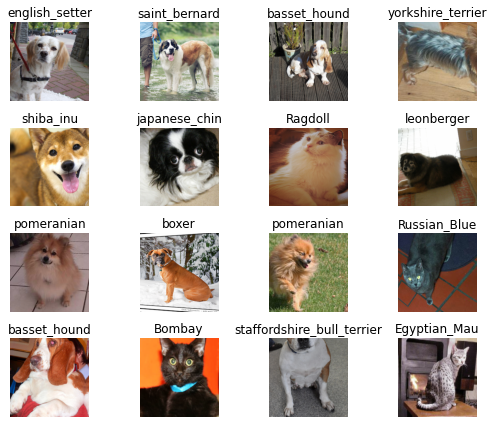

In [34]:
dataBunch.show_batch(rows=4, figsize=(7,6))

In [21]:
dataBunch.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [22]:
len(dataBunch.classes)

37

## Training: resnet34

Now we will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Specifically, we will use reset34. We are in fact building a function which will take an image as input and will compute an output for the input. 

Question 6. What kind of information does this output represent?


In [23]:
learner = cnn_learner(dataBunch, models.resnet34, metrics=error_rate)
# Question 7: We use function cnn_learner() to create an object that will learn a neural network
# by feeding dataBunch to the pretrained resnet34.

# 7.1) From which package was "models" imported?
##I can see the download root saying download.pytorch.org/models. So I can guess it is from pytorch package

# models.resent34 is a pretained neural network, that is, the neural network that is 
# already trained by using one and half a million images and thousands of categories. 
# We are going to train the new neural network  by using less than
# 10000 dog and cat images and 37 categories. That is, we are going to retrain the
# pretrained neural network "resnet34" by using few dogs and cats images (less than 1 % of the 
# dataset used to train the original pretrained neural network). 
# This neural network is supposed to classify new types of images, i.e. dogs and cats better than the original
# resnet34. 

# In the following, the neural network "freezes" the much of the neural network "reset34" and retain
# only a tiny part of it using the new dataset. This process is called "learning transfer".
# 
# 7.2) Tell me which part of the resnet34 is re-trained and which part of it remains to be fixed?
# To answer this question, refer:
# the first figure in this site: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
# # https://blog.roboflow.com/how-to-train-a-custom-resnet34-model/. 
# and picture "34 layers residual" in https://blog.roboflow.com/custom-resnet34-classification-model/ .
## There are 34 layers in resnet 34. There is last layer named Fulley Connected. The re-trained part is last layer FC and other 33 layers are remained.
##We can unfreeze thoes layers by using 'unfreezing'

# 7.3) Please tell me why this learning transfer would work? 
## Because the 33 layers(except last layer) were pre trained with a lot of datasets(processes are called convolution and pooling) 
##so we can use it by fixing tiny part of Neural Network.


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# Question 8: (8.1) Please re-train the neural network for 5 epochs.
# (8.2) For each epoch, it will show the train_loss and the validation_loss. 
# Explain how these losses are computed. 
## loss is defined as difference between predicted value and actual value. I guess in this notebook, it used MSE loss function. 
##And I guess the formation of file is image so we can calculate values by pixels.

# (8.3) Tell me how the train_loss and the validation_loss change as the epoch progresses.
## 
# (8.4) Tell me how "error_rate" would be computed? 
# You need to refer to what kind of data is used to compute the error-rate.
##error_rate is computed as 1-accuracy. And it is related to losses we've got. The valid dataset is used for compute error_rate. It is for the validation

# (8.5) Would you increase the number of epochs or decrease it to get a better result?
## When the epoch increased, the error_rate decreased. So we have to increase the number of epochs.

In [25]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [26]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.487923,0.335497,0.107578,01:34
1,0.631606,0.273452,0.090663,01:33
2,0.413603,0.261725,0.078484,01:32
3,0.304499,0.227995,0.077808,01:32
4,0.220189,0.225048,0.077131,01:32


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

## Results

Let's see what results we have got. 

See  which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [27]:
interpretation = ClassificationInterpretation.from_learner(learner)

losses,indices = interpretation.top_losses()
# QUestion 9. 
# 9.1) Please show the first 10 values of losses and indices, and explain  they represent?
## losses represent loss and it is lined in descending way. and the indices is for the index of image which is corresponding to loss
#so for example, 8.0107 is the loss for the image which index is 1295

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [30]:
losses[:10]

tensor([8.0107, 7.5658, 7.4736, 7.3643, 7.0188, 6.1901, 5.3689, 5.3552, 4.9841,
        4.8795])

In [29]:
indices[:10]

tensor([1295,  478,  861,  353,  518,  676,   47,  497, 1125, 1435])

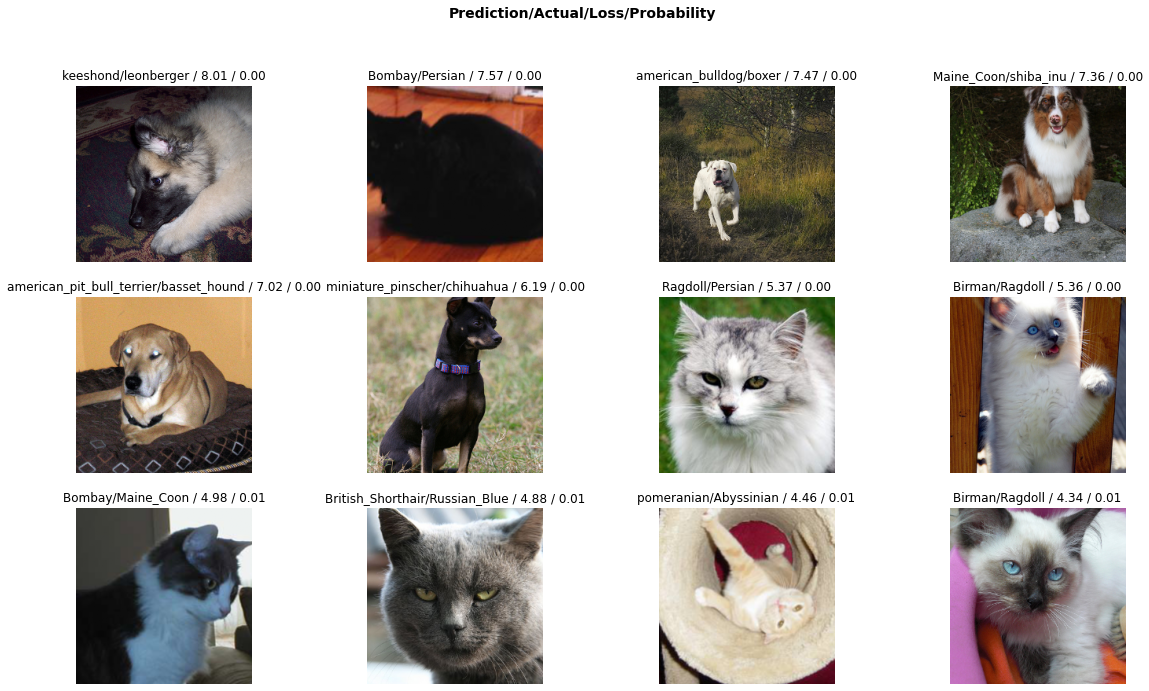

In [32]:
interpretation.plot_top_losses(12, largest=True, figsize=(20,11))
# Question 10. 10.1) Use the above function to see the result of classification for the validation dataset. 
# Please explain the meaning of the first item and the meaning of the 12th item.
##It is lined in descending way. Its standard is loss which is the third one in the above text. 
##So, the first image is for the most failed one to predict.(Its loss is the best). And the 12th one is for the data which has 12th loss.

# 10.2) execute interp.plot_top_losses(12, largest=False, figsize=(20,11))
# Explain the meaning of the 12th item.
##I think it is lined in ascending way. So the 12 images has loss 0. And every item predicted actual one very well.
##As other ones, 12th item is well predicted so that loss is 0 and probability is perfectly 1, the max value

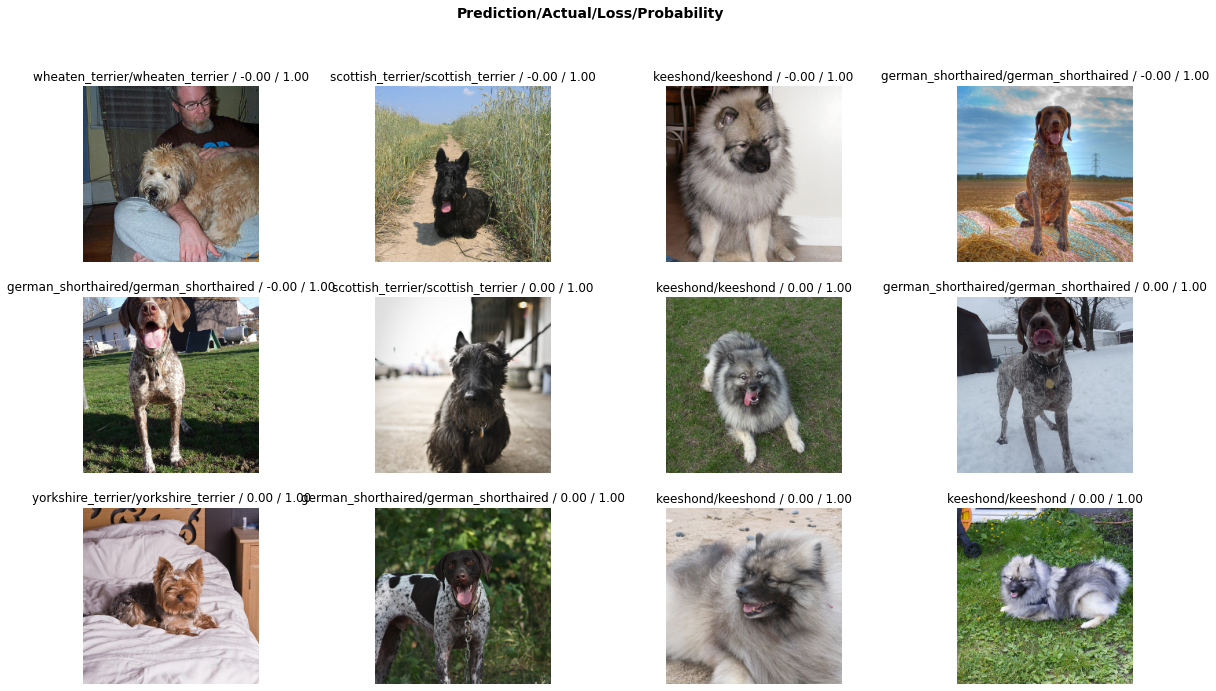

In [35]:
interpretation.plot_top_losses(12, largest=False, figsize=(20,11))

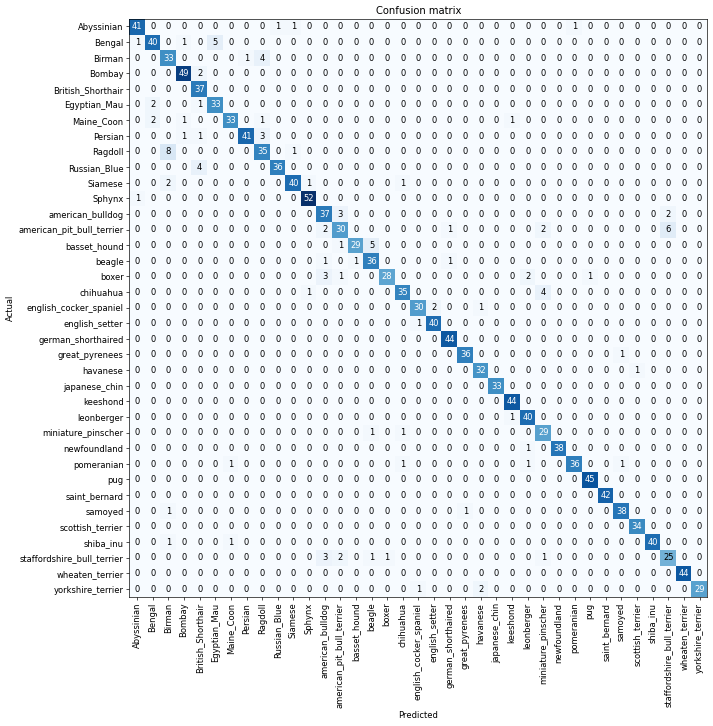

In [36]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)
# Question 11: 11.1) It will show the 37 x 37 matrix. What does the row of 
#  "american_pit_bull_terrier" tell you about the capability of this neural network?
##There were actually 2+30+1+2+6 american_pit_bull_terrier in data. But it predicted only 30 items. 
##So that we can guess the capability of neural network, as the accuary of 'american_pit_Bull_terrier', 30/41.
##I think it is good result. 
